In [7]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from skimage.io import imread, imsave
from PIL import Image
import datetime
from tqdm import tqdm

In [8]:
print(os.listdir("E:\Personal\Great_Lakes\cvpr-2018-autonomous-driving"))

['convertVideotoCSV.py', 'EvaluationScriptsAndExamples.zip', 'sample_submission.csv', 'test.zip', 'test_video_list_and_name_mapping.zip', 'train_color', 'train_label', 'train_label.zip', 'train_video_list.zip']


In [9]:
data_dir = Path("E:\Personal\Great_Lakes\cvpr-2018-autonomous-driving")
images_dir = data_dir / 'train_color'
labels_dir = data_dir / 'train_label'

In [10]:
train_images = sorted(os.listdir(images_dir))
train_labels = sorted(os.listdir(labels_dir))

print("Number of images and labels in the training data: {}  and {} respectively".format(len(train_images), len(train_labels)))

Number of images and labels in the training data: 39222  and 39222 respectively


In [11]:
labelmap = {0:'others', 
            1:'rover', 
            17:'sky', 
            33:'car', 
            34:'motorbicycle', 
            35:'bicycle', 
            36:'person', 
            37:'rider', 
            38:'truck', 
            39:'bus', 
            40:'tricycle', 
            49:'road', 
            50:'siderwalk', 
            65:'traffic_cone', 
            66:'road_pile', 
            67:'fence', 
            81:'traffic_light', 
            82:'pole', 
            83:'traffic_sign', 
            84:'wall', 
            85:'dustbin', 
            86:'billboard', 
            97:'building', 
            98:'bridge', 
            99:'tunnel', 
            100:'overpass', 
            113:'vegatation', 
            161:'car_groups', 
            162:'motorbicycle_group', 
            163:'bicycle_group', 
            164:'person_group', 
            165:'rider_group', 
            166:'truck_group', 
            167:'bus_group', 
            168:'tricycle_group'}

In [13]:
# Mark Start time
start = datetime.datetime.now()

# Create an empty dataframe
data_df = pd.DataFrame()
df_list = []

# Iterate over data. I have just shown it for 500 images just to save time 
for idx in tqdm(range(2000)):
    # Get the image name and corresponding label
    img_name = train_images[idx]
    label_name = train_labels[idx]
    
    # as_gray parameter is used to turn RBG image to grayscale
    # using grayscale images will reduce size by 1/3rd
    label = imread((labels_dir / train_labels[idx]), as_gray=True)    
    img = imread((images_dir / train_images[idx]), as_gray=True)    
    
    # Save image to gray scale, commented since it takes lot of time
    #imsave("gray_"+img_name, img)    
    
    pixel_classes = np.unique(label)//1000    
    classes, instance_count = np.unique(pixel_classes, return_counts=True) # Courtesy:https://www.kaggle.com/jpmiller/cvpr-eda
    data_dict = dict(zip(classes, instance_count))
    df = pd.DataFrame.from_dict(data_dict, orient='index').transpose()
    df.rename(columns=labelmap, inplace=True)
    df['img'] = img_name
    df['label'] = label_name
    df['size'] = f'{img.shape[0]}_{img.shape[1]}'
    
    # Concate to the final dataframe
    #data_df = pd.concat([data_df, df], copy=False)
    # append to the list of intermediate df list
    df_list.append(df)
    
data_df = pd.concat(df_list, axis=0)
del df_list

# Fill the NaN with zero
data_df = data_df.fillna(0)

# Rearrange the columns
cols = data_df.columns.tolist()
cols = [x for x in cols if x not in ['img', 'label', 'size']]
cols = ['img', 'label', 'size'] + cols
data_df = data_df[cols]

# Display the results
data_df = data_df.reset_index(drop=True)
data_df.to_excel("ImageWise_ClassCount_1.xls")

# Mark End time
end = datetime.datetime.now()


100%|██████████| 2000/2000 [41:11<00:00,  1.12s/it]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [14]:
duration = end - start
print("Total time taken = ", duration)

Total time taken =  0:41:13.753455


In [15]:
data_df.head(10)

,img,label,size,bicycle,bus,car,motorbicycle,others,person,rider,traffic_cone,tricycle,truck
0,170908_061502408_Camera_5.jpg,170908_061502408_Camera_5_instanceIds.png,2710_3384,0.0,1.0,4.0,0.0,1,0.0,0.0,0.0,1.0,0.0
1,170908_061502408_Camera_6.jpg,170908_061502408_Camera_6_instanceIds.png,2710_3384,0.0,1.0,3.0,0.0,1,0.0,0.0,0.0,1.0,0.0
2,170908_061502547_Camera_5.jpg,170908_061502547_Camera_5_instanceIds.png,2710_3384,0.0,1.0,4.0,0.0,1,0.0,0.0,0.0,1.0,0.0
3,170908_061502547_Camera_6.jpg,170908_061502547_Camera_6_instanceIds.png,2710_3384,0.0,1.0,3.0,0.0,1,0.0,0.0,0.0,1.0,0.0
4,170908_061502686_Camera_5.jpg,170908_061502686_Camera_5_instanceIds.png,2710_3384,0.0,1.0,4.0,0.0,1,0.0,0.0,0.0,1.0,0.0
5,170908_061502686_Camera_6.jpg,170908_061502686_Camera_6_instanceIds.png,2710_3384,0.0,1.0,3.0,0.0,1,0.0,0.0,0.0,1.0,0.0
6,170908_061502825_Camera_5.jpg,170908_061502825_Camera_5_instanceIds.png,2710_3384,0.0,1.0,3.0,0.0,1,0.0,0.0,1.0,1.0,0.0
7,170908_061502825_Camera_6.jpg,170908_061502825_Camera_6_instanceIds.png,2710_3384,0.0,1.0,3.0,0.0,1,0.0,0.0,0.0,1.0,0.0
8,170908_061502964_Camera_5.jpg,170908_061502964_Camera_5_instanceIds.png,2710_3384,0.0,1.0,3.0,0.0,1,0.0,0.0,1.0,1.0,0.0
9,170908_061502964_Camera_6.jpg,170908_061502964_Camera_6_instanceIds.png,2710_3384,0.0,1.0,2.0,0.0,1,0.0,0.0,0.0,1.0,0.0


In [16]:
# Count in how many images a particular class is found
clss_count = []
for cls_label in labelmap.values():
    if cls_label in data_df.columns:
        clss_count.append(data_df[data_df[cls_label] > 0].shape[0])
    else:
        clss_count.append(0)
        
df_cls_count = pd.DataFrame(index=labelmap.values(), data={'Count' : clss_count})
df_cls_count.T

,others,rover,sky,car,motorbicycle,bicycle,person,rider,truck,bus,...,overpass,vegatation,car_groups,motorbicycle_group,bicycle_group,person_group,rider_group,truck_group,bus_group,tricycle_group
Count,2000,0,0,1972,2,174,223,1,86,1414,...,0,0,0,0,0,0,0,0,0,0


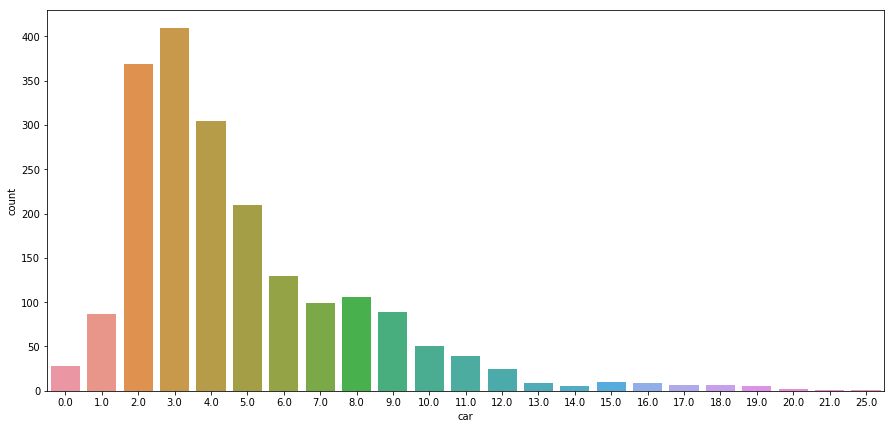

In [17]:
plt.figure(figsize=(15, 7))
sns.countplot(data_df['car'])

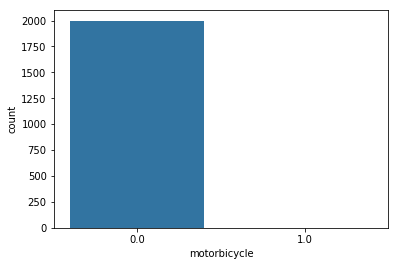

In [18]:
sns.countplot(data_df['motorbicycle'])

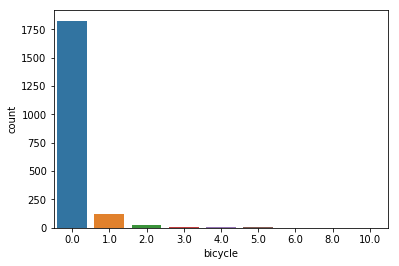

In [19]:
sns.countplot(data_df['bicycle'])

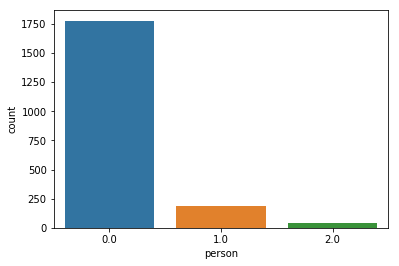

In [20]:
sns.countplot(data_df['person'])

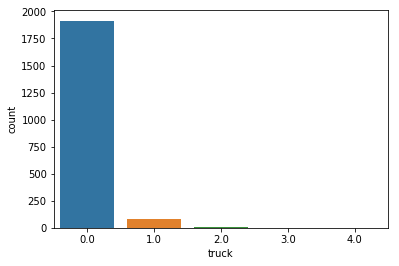

In [21]:
sns.countplot(data_df['truck'])

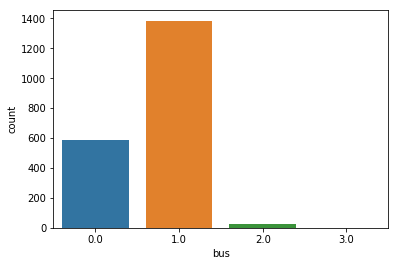

In [22]:
sns.countplot(data_df['bus'])

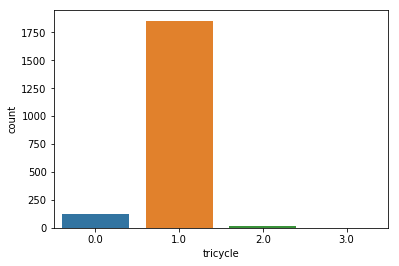

In [23]:
sns.countplot(data_df['tricycle'])

In [24]:
data_df['size'].value_counts()
# So all 2K images are of same size

2710_3384    2000
Name: size, dtype: int64